# Machine Learning para Detecção de Doença Cardíaca

As doenças cardíacas são uma preocupação crescente nos Estados Unidos, afetando milhões de pessoas a cada ano e tendo um impacto significativo na saúde pública e na economia. O acúmulo de placas nas artérias coronárias, pressão alta, diabetes e outras condições médicas são fatores de risco para doenças cardíacas. A prevenção, a detecção precoce e o tratamento adequado são fundamentais para reduzir o número de casos e melhorar a qualidade de vida dos pacientes com doenças cardíacas.

A utilização de tecnologias, como o Machine Learning, tem como objetivo principal aprimorar a precisão e agilidade do diagnóstico, sendo o diagnóstico precoce de doenças cardíacas um fator crucial para a redução da mortalidade relacionada a essas enfermidades.

Nesse projeto de Data Science foi construido um modelo de Machine Learning capaz de pessoas com doença cárdiaca.

Fontes de dados informações:

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

## Sobre o conjunto de dados

Este trabalho analisou um conjunto de dados do BRFSS 2015, uma pesquisa telefônica anual coletada pelo CDC nos Estados Unidos, que reúne informações sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e uso de serviços preventivos. O conjunto de dados original contém respostas de 441.455 indivíduos e 330 recursos. O conjunto de dados utilizado neste projeto contém 253.680 respostas de pesquisa do BRFSS 2015 e foi limpo para ser usado principalmente para a classificação binária de doenças cardíacas. Há um equilíbrio razoável de classe neste conjunto de dados, com 229.787 entrevistados sem doença cardíaca e 23.893 com doença cardíaca. O objetivo deste projeto é explorar o conjunto de dados para obter informações sobre a classificação de doenças cardíacas.

# Etapas do projeto:

- Coleta dos dados:
  1. Importar os pacotes e dataset necessários
  2. Leitura do Arquivo
- Limpeza e preparação dos dados
- Exploração dos dados
- Modelagem dos dados
- Algoritmos de Machine Learning
- Avaliar desempenho dos modelos usando as metricas corretas

## Importando as bibliotécas necessárias
Nosso arquivo em CSV será importado para uma estrutura DataFrame utilizando a biblioteca Pandas para manipular e análisar os dados.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as sts
from sklearn.model_selection import train_test_split
import sklearn.metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

Lendo o arquivo CSV

In [70]:
#Importando os dados
dataset= pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

## Visualizando o shape, as primeiras e ultimas 5 linhas do dataset com 'display'

O display() é uma função da biblioteca Pandas que permite visualizar um datasete de forma mais amigável e organizada. Ele formata os dados em uma tabela com linhas e colunas, permitindo uma leitura mais clara e facilitando a análise dos dados.

In [69]:
#Visualizando os Dados
display(dataset)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Visualizando informações básicas do dataset, incluindo o número de entradas, o número de colunas, os nomes das colunas, os tipos de dados em cada coluna e o número de valores não nulos em cada coluna.

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Verificando se há algum valor nulo

In [42]:
dataset.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Considerando que nosso conjunto de dados não apresenta valores faltantes e nenhum problema foi detectado, não será necessário investir muito tempo na limpeza dos dados. Entretanto, é importante lembrar que a etapa de limpeza e preparação das informações pode ser uma das mais demoradas para um cientista de dados.

# Análise Exploratória

## Vizualisando o total de registros de doentes ou não doentes

Verificando como está o balanceamento do dataset de acordo com a variável alvo, HeartDiseaseorAttack.

Apresentam doença cardiaca:  229787
Não apresentam doença cardiaca:  23893


C:\Users\Alanf\download\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


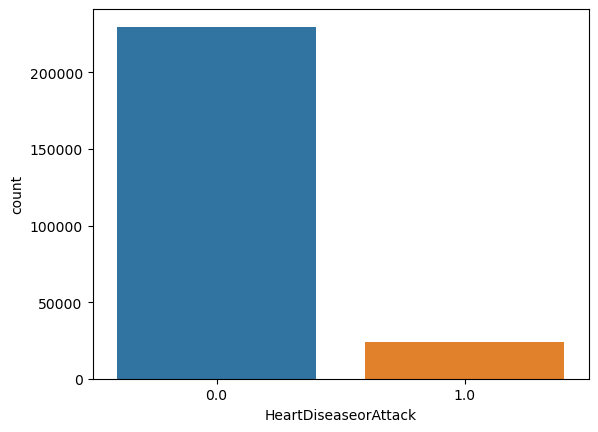

In [44]:
#Visualisando Número total de registros de doentes ou não doentes
Y= dataset.HeartDiseaseorAttack

ax = sns.countplot(Y,label="Quantidade")       # M = 212, B = 357
S, N = Y.value_counts()
print('Apresentam doença cardiaca: ', S)
print('Não apresentam doença cardiaca: ', N)

O método describe() é uma função em Pandas que fornece um resumo estatístico descritivo dos dados contidos em um dataframe. Ele retorna várias informações como média, desvio padrão, valor mínimo, valor máximo, quartis e contagens de valores não nulos para todas as colunas numéricas do dataframe. Esse método é útil para dar uma visão geral dos dados, entender a distribuição e o intervalo dos valores de cada variável e detectar possíveis problemas, como outliers ou valores faltantes.

In [45]:
dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


O Heatmap é frequentemente usado para visualizar a relação entre duas ou mais variáveis em um conjunto de dados. É uma ferramenta útil para identificar padrões e tendências nos dados, tornando mais fácil para os usuários identificar relacionamentos e insights importantes.

<AxesSubplot:>

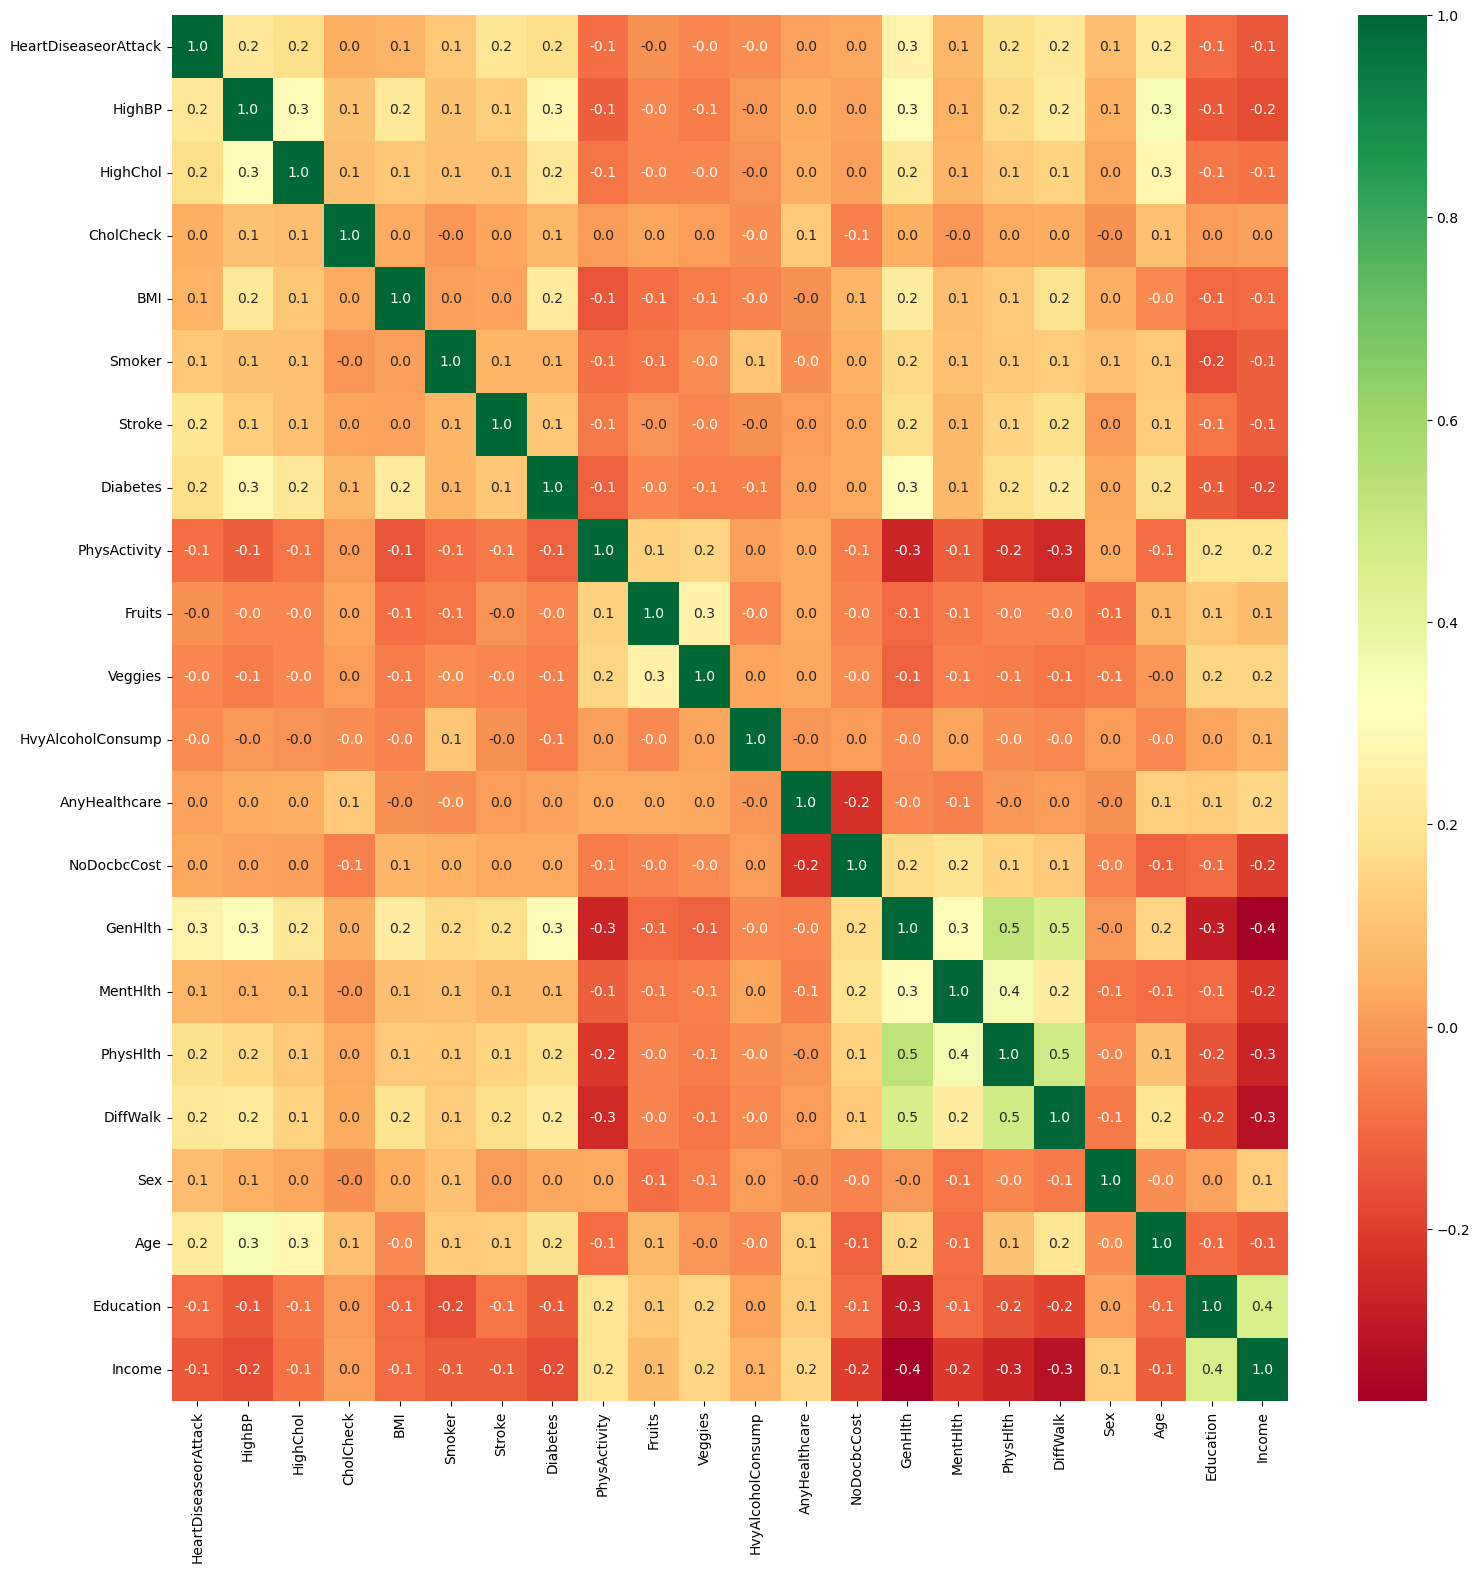

In [46]:
# Mostrar mapa de calor 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset.corr(), annot=True, fmt= '.1f', cmap ='RdYlGn')

# Preparação dos dados

In [47]:
# Separar dados em Treino e Teste 

Y = dataset.HeartDiseaseorAttack
X = dataset.drop('HeartDiseaseorAttack', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10) # random_state=10 foi mantido para questão de REPRODUCIBILIDADE. (Separar os dados da mesma forma independente da execução). 

print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ',x_test.shape[0]) #qtd de registros para teste

Quantidade de registros para treino:  190260
Quantidade de registros para teste:  63420


No fim do código, como em todo projeto de Machine Learning, o dataset foi dividido em dados de treino e teste. Agora de fato vai ser possivel construir o modelo.

# Modelo de Machine Learning para detecção de Doença Cardíaca

Usaremos um modelo do tipo árvore de decisão (Tree Decision) devido sua capacidade de lidar com dados categóricos e numéricos, ser facilmente interpretável e visualizável, exigir menos preparação de dados em comparação com outros algoritmos de Machine Learning, e poder lidar com grandes conjuntos de dados.

In [48]:
# Importando a árvore de decisão
from sklearn import tree

In [49]:
# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [50]:
# Fazendo o fit com os dados de treino
clf = clf.fit(x_train, y_train)

## Desempenho do modelo

In [51]:
# Verificando o score
clf.score(x_train,y_train)

0.9962262167560181

Observa-se que o modelo obteve resultados satisfatórios nas métricas avaliadas. No entanto, é importante lembrar que uma alta acurácia não necessariamente indica que o modelo é adequado. 

Por fim, será apresentada uma matriz de confusão para análise.

In [53]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52275,  5045],
       [ 4361,  1739]], dtype=int64)

<AxesSubplot:>

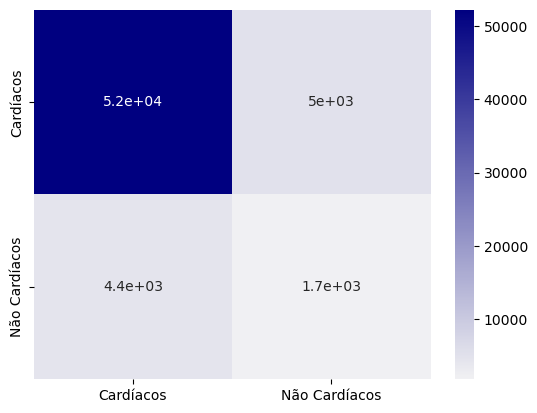

In [54]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Cardíacos', 'Não Cardíacos']],
                  columns = [i for i in ['Cardíacos', 'Não Cardíacos']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_cm, annot=True, cmap=cmap)

Como podemos observar através da Matriz de Confusão, nosso modelo mesmo tendo uma acurácia alta, faz muitas previsões erradas. Provavelmte devido ao grande números de colunas. A seguir vamos tentar solucionar esse problema

Utilizando o XGBClassifier é possível extrair a importância relativa de cada atributo (feature) utilizado no processo de classificação.

In [55]:
model= XGBClassifier(learning_rate=1, max_depth=1).fit(x_train, y_train)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

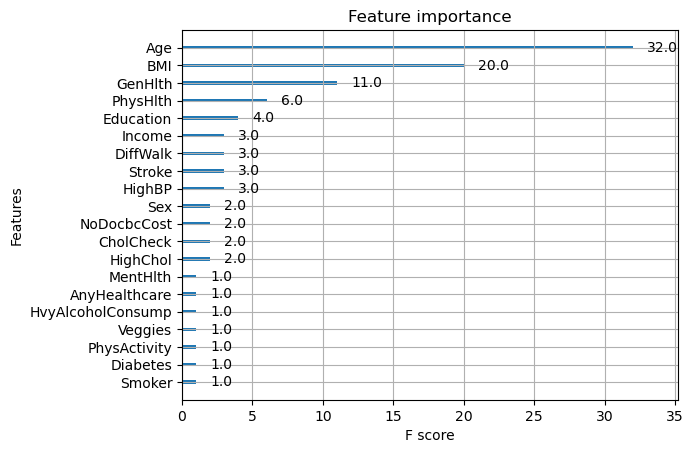

In [56]:
plot_importance(model)
plt.show()

Como podemos ver acima, alguns atributos apresentam importância baixa em relação ao nosso atribito alvo. Excluiremos todos os atributos com importância menor que 2.0 e refaremos todo processo de Machine Learning

In [57]:
Y = dataset.HeartDiseaseorAttack
X = dataset.drop(['MentHlth', 'AnyHealthcare', 'HvyAlcoholConsump', 'Veggies', 'PhysActivity', 'Diabetes', 'Smoker'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10) # random_state=10 foi mantido para questão de REPRODUCIBILIDADE. (Separar os dados da mesma forma independente da execução). 

print('Quantidade de registros para treino: ', x_train.shape[0]) 
print('Quantidade de registros para teste: ',x_test.shape[0]) #qtd de registros para teste

Quantidade de registros para treino:  190260
Quantidade de registros para teste:  63420


In [58]:
# Importando a árvore de decisão
from sklearn import tree

In [59]:
# Criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [60]:
# Fazendo o fit com os dados de treino
clf = clf.fit(x_train, y_train)

# Desempenho do NOVO modelo

In [61]:
# Verificando o score
clf.score(x_train,y_train)

1.0

In [62]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[57320,     0],
       [    0,  6100]], dtype=int64)

<AxesSubplot:>

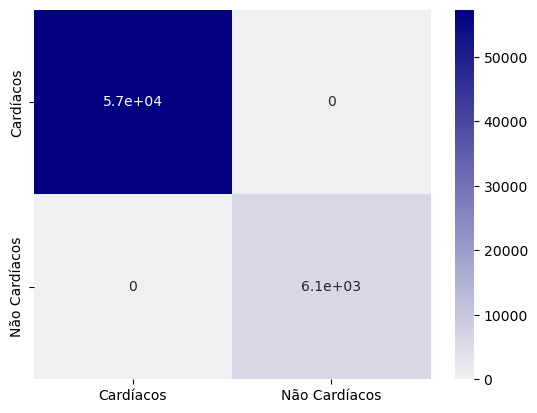

In [63]:
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Cardíacos', 'Não Cardíacos']],
                  columns = [i for i in ['Cardíacos', 'Não Cardíacos']])

cmap = sns.light_palette("navy", as_cmap=True)
plt.figure()
sns.heatmap(df_cm, annot=True, cmap=cmap)

O modelo árvore de decisão (Tree Decision) foi capaz de atingir uma acurácia de 100%

# Discussão e conclusão

Após o ajuste nosso modelo ficou perfeito! Porém, embora seja uma meta desejável em muitas aplicações, é importante destacar que a obtenção de um modelo de previsão perfeita é uma tarefa muito difícil e muitas vezes impossível.

Em primeiro lugar, é importante lembrar que os dados utilizados para treinar o modelo são uma representação limitada do universo de possíveis dados que o modelo pode encontrar no futuro. Isso significa que mesmo que o modelo tenha uma performance perfeita nos dados de treinamento, é possível que ele falhe ao encontrar dados novos que apresentem características diferentes.

Em segundo lugar, é importante considerar que, em muitos casos, a obtenção de um modelo com previsão perfeita pode não ser desejável ou até mesmo prejudicial. Isso ocorre porque um modelo com previsão perfeita pode ser um sinal de overfitting, ou seja, o modelo aprende detalhes específicos dos dados de treinamento que não são relevantes para o problema em questão.

Além disso, um modelo com previsão perfeita pode ser menos interpretável, o que significa que é difícil entender como o modelo está tomando suas decisões e pode ser difícil para um especialista do domínio avaliar a qualidade do modelo.

Por outro lado, é importante lembrar que um modelo de machine learning com uma previsão altamente precisa pode ter uma grande importância prática em muitas aplicações. Por exemplo, em aplicações médicas, um modelo de previsão perfeita para determinar se um paciente tem ou não uma doença pode ser uma ferramenta extremamente valiosa.

Em resumo, embora um modelo de machine learning com previsão perfeita seja uma meta desejável, é importante lembrar que isso pode ser difícil de alcançar e pode não ser sempre desejável. No entanto, um modelo com alta precisão pode ser uma ferramenta valiosa em muitas aplicações práticas.